## Welcome
Conclusions are in markdown boxes like this, much of the other stuff is just me showing my work. Be aware that for the last two insights I switched to R, and my work is in a .R file in the main directory.

In [54]:
import pandas as pd
import numpy as np
from plotnine import *
import seaborn as sns
import re

# Read in

DATA_SOURCE = "2020-XTern-DS.csv"
df = pd.read_csv(DATA_SOURCE)
print(df.columns)
print(df.info())
df

Index(['Restaurant', 'Latitude', 'Longitude', 'Cuisines', 'Average_Cost',
       'Minimum_Order', 'Rating', 'Votes', 'Reviews', 'Cook_Time'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019 entries, 0 to 2018
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant     2019 non-null   object 
 1   Latitude       2019 non-null   float64
 2   Longitude      2019 non-null   float64
 3   Cuisines       2019 non-null   object 
 4   Average_Cost   2019 non-null   object 
 5   Minimum_Order  2019 non-null   object 
 6   Rating         2019 non-null   object 
 7   Votes          2019 non-null   object 
 8   Reviews        2019 non-null   object 
 9   Cook_Time      2019 non-null   object 
dtypes: float64(2), object(8)
memory usage: 157.9+ KB
None


,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time
0,ID_6321,39.262605,-85.837372,"Fast Food, Rolls, Burger, Salad, Wraps",$20.00,$50.00,3.5,12,4,30 minutes
1,ID_2882,39.775933,-85.740581,"Ice Cream, Desserts",$10.00,$50.00,3.5,11,4,30 minutes
2,ID_1595,39.253436,-85.123779,"Italian, Street Food, Fast Food",$15.00,$50.00,3.6,99,30,65 minutes
3,ID_5929,39.029841,-85.332050,"Mughlai, North Indian, Chinese",$25.00,$99.00,3.7,176,95,30 minutes
4,ID_6123,39.882284,-85.517407,"Cafe, Beverages",$20.00,$99.00,3.2,521,235,65 minutes
...,...,...,...,...,...,...,...,...,...,...
2014,ID_4366,39.624978,-85.189212,"North Indian, Pizza, Burger, Continental",$40.00,$0.00,-,-,-,30 minutes
2015,ID_319,39.133719,-85.503020,"Awadhi, Bihari",$40.00,$99.00,4.1,118,91,30 minutes
2016,ID_3104,39.662987,-85.950894,"Fast Food, Beverages",$10.00,$50.00,NEW,-,-,30 minutes
2017,ID_4396,39.301765,-85.662768,"Kebab, Fast Food",$10.00,$50.00,-,-,-,30 minutes


In [85]:
# data wrangle
pd.to_numeric(df.Average_Cost, errors='coerce')
# get rid of little things stopping us from inferring values
dollar_sign = re.compile('\$')
df = df.replace(to_replace=dollar_sign, value='')
minutes = re.compile('\sminutes')
df.Cook_Time = df.Cook_Time.replace(to_replace=minutes, value = '')
# force numeric types onto most columns
numeric_columns = df.columns.drop(['Restaurant', 'Cuisines'])
# adds NAs in Rating Votes and Reviews columns
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors = 'coerce')
print(df.info())
df.to_csv('wrangled.csv')
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019 entries, 0 to 2018
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant     2019 non-null   object 
 1   Latitude       2019 non-null   float64
 2   Longitude      2019 non-null   float64
 3   Cuisines       2019 non-null   object 
 4   Average_Cost   2017 non-null   float64
 5   Minimum_Order  2019 non-null   float64
 6   Rating         1666 non-null   float64
 7   Votes          1639 non-null   float64
 8   Reviews        1604 non-null   float64
 9   Cook_Time      2019 non-null   int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 157.9+ KB
None


,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time
0,ID_6321,39.262605,-85.837372,"Fast Food, Rolls, Burger, Salad, Wraps",20.0,50.0,3.5,12.0,4.0,30
1,ID_2882,39.775933,-85.740581,"Ice Cream, Desserts",10.0,50.0,3.5,11.0,4.0,30
2,ID_1595,39.253436,-85.123779,"Italian, Street Food, Fast Food",15.0,50.0,3.6,99.0,30.0,65
3,ID_5929,39.029841,-85.332050,"Mughlai, North Indian, Chinese",25.0,99.0,3.7,176.0,95.0,30
4,ID_6123,39.882284,-85.517407,"Cafe, Beverages",20.0,99.0,3.2,521.0,235.0,65
...,...,...,...,...,...,...,...,...,...,...
2014,ID_4366,39.624978,-85.189212,"North Indian, Pizza, Burger, Continental",40.0,0.0,NaN,NaN,NaN,30
2015,ID_319,39.133719,-85.503020,"Awadhi, Bihari",40.0,99.0,4.1,118.0,91.0,30
2016,ID_3104,39.662987,-85.950894,"Fast Food, Beverages",10.0,50.0,NaN,NaN,NaN,30
2017,ID_4396,39.301765,-85.662768,"Kebab, Fast Food",10.0,50.0,NaN,NaN,NaN,30


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal


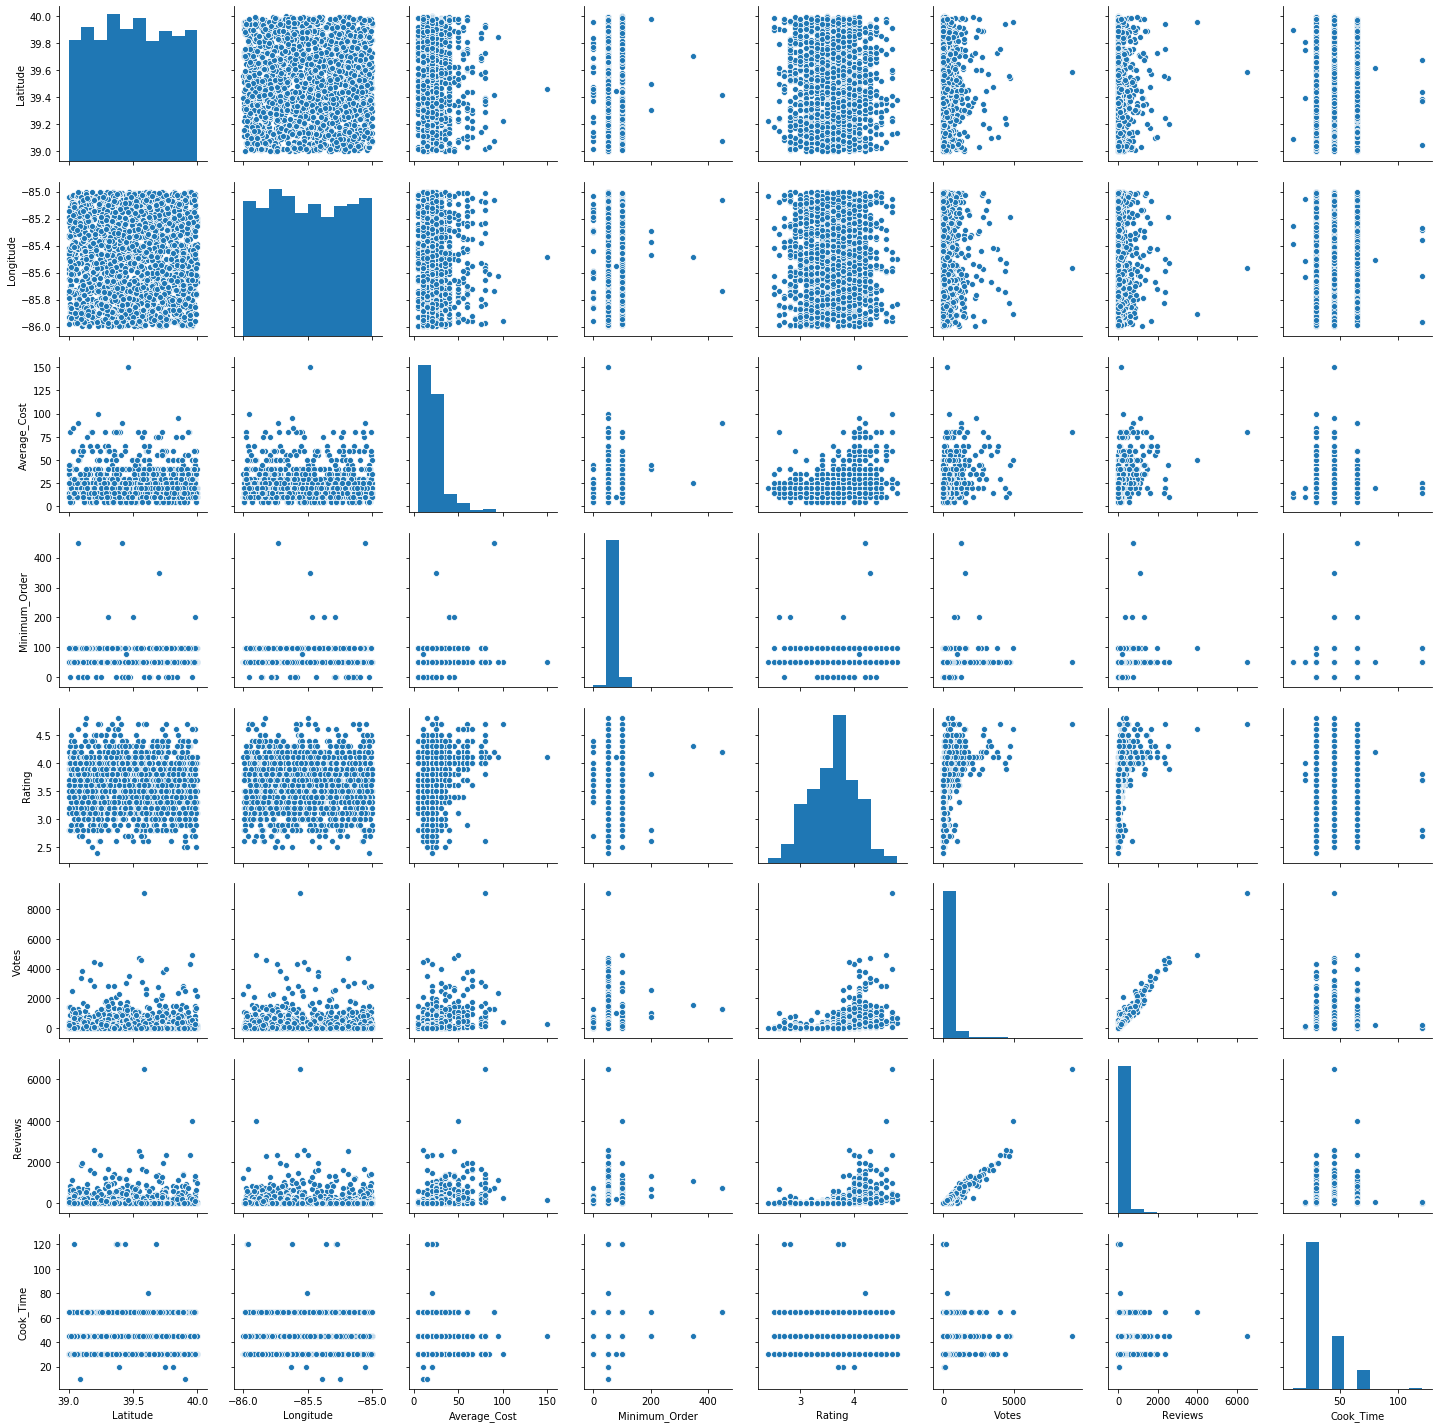

In [56]:
sns.pairplot(df)

C:\Users\sean1\AppData\Roaming\Python\Python37\site-packages\plotnine\layer.py:467: PlotnineWarning: geom_point : Removed 415 rows containing missing values.


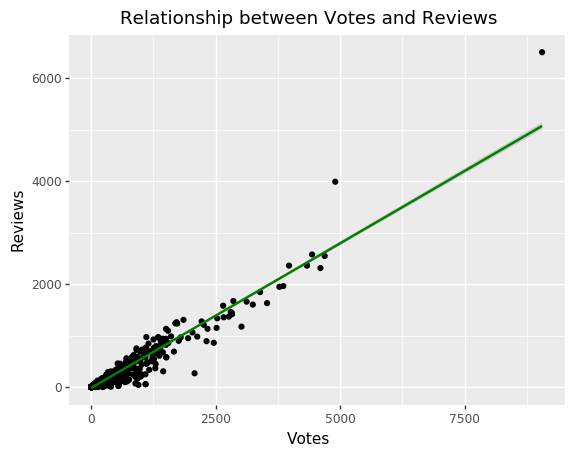

<ggplot: (-9223371906925181532)>

In [81]:
fig1 = ggplot(df, aes(x = 'Votes', y='Reviews')) + geom_point() + geom_smooth(color='green') +\
ggtitle("Relationship between Votes and Reviews")
fig1

### Votes and Reviews
There seems to be a positive correlation between the amount of Votes and the amount of Reviews.

C:\Users\sean1\AppData\Roaming\Python\Python37\site-packages\plotnine\layer.py:467: PlotnineWarning: geom_jitter : Removed 355 rows containing missing values.


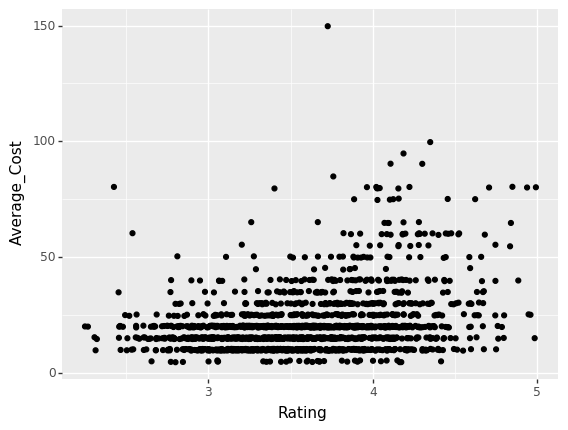

<ggplot: (-9223371906923827452)>

In [82]:
fig2 = ggplot(df, aes(x='Rating', y='Average_Cost')) + geom_jitter()
fig2

### Rating and Average Cost
There seems to be a relationship of some kind between Rating and Average Cost, although it is difficult to tell what kind.

I am much more comfortable in R, so at this point I just moved over to R. The R script I used will be in the directory.

### Southern Comfort food? 
I've heard it said that the south knows how to do food, and anecdotally I agree. Can the Foodie data back it up?

I started by selecting out the ratings from restaurants which were above and below the Mason-Dixon line. I was then able to run multiple independent sample t tests for differences in means. 

I ran two tests. The first had a null hypothesis of no difference and an alternative of a difference. I failed to reject H0. I did not have significant evidence (alpha = 0.05, df = 857.63) that the true difference of means between Southern and Northern ratings was not 0. The second was one sided with the same alpha to try and see if I could get a result in the south's favor, but it ultimately had the same result. 

You can see in these histograms that the Southern and Northern ratings distribution are pretty similar, the lines are their means.
![Southern and Nothern Ratings](svn_ratings.png)

### Investigating "Fast Food"
One useful thing to know about a restaurant is whether or not it is fast food. Most would expect food to be cooked quickly at a fast food restaurant, as that is kind of the point. Here I tried to find out how fast fast food restaurants are, and how they measure up to other places.

First I selected restaurants which offer "Fast Food" as a type of cuisine. Then I did a one sample t based confidence interval to find the population mean of fast food cooking times. The result is that I am 95% confident (df = 560) that the average cooking time for restaurants which offer "Fast Food" cuisine is between 35.8 and 37.9 minutes.

I was surprised by how long it takes for fast food to be cooked, so I decided to compare it to non fast food restaurants. I separated out all the restaurants which offered "Fast Food" cuisine, and did a t based confidence interval to see where the rest fall. The result is that I am 95% confident (df = 1457) that the average cooking time for non "Fast Food" restaurants is between 36.4 and 37.5.

This is an odd result, and it could be used to decide whether Foodie should surface data about the restaurants "Fast Food" label or perhaps the average cooking time instead. Personally I would surface cooking time, as it is probably the relavent statistic when someone is looking for food fast.